In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets

In [ ]:
## Moons Dataset
X, y = datasets.make_moons(500, noise = 0.10)

<Axes: >

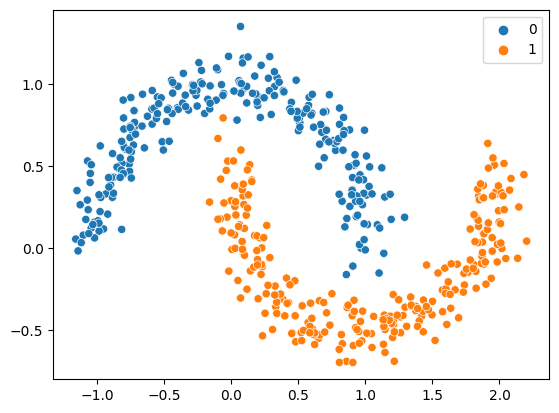

In [ ]:
## Plot Moons
import seaborn as sns

sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting
    the model as we need to find the predicted value for every point in
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator

    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.Greys)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

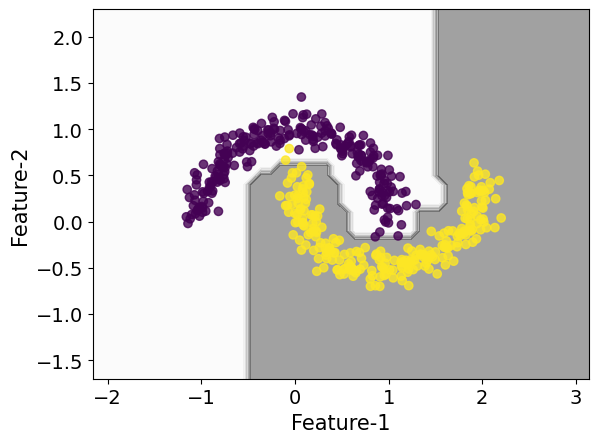

In [ ]:
## Decison Stump
## max_depth = 1
from sklearn.tree import DecisionTreeClassifier

plot_decision_boundaries(X, y, DecisionTreeClassifier, max_depth = None)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

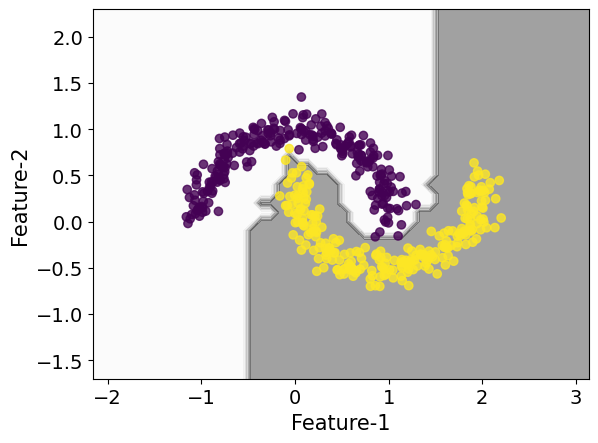

In [ ]:
from sklearn.ensemble import RandomForestClassifier

plot_decision_boundaries(X, y, RandomForestClassifier, n_estimators = 100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

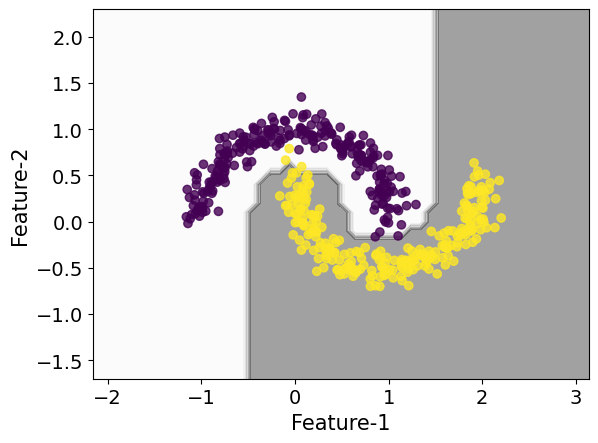

In [ ]:
from sklearn.ensemble import BaggingClassifier

plot_decision_boundaries(X, y, BaggingClassifier, n_estimators = 100)

## **Boosting Ensemble**

* AdaBoost - Adaptive Boosting: fit decision stumps and then combine those.

In [ ]:
## import
from sklearn.ensemble import AdaBoostClassifier

## instance
ada = AdaBoostClassifier(n_estimators = 100)

## fit
ada.fit(X,y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=100)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

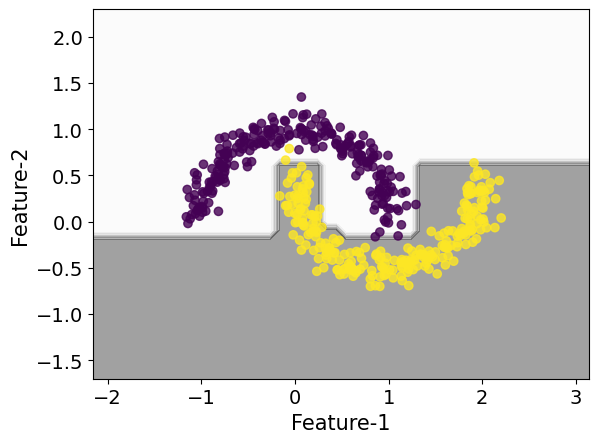

In [ ]:
plot_decision_boundaries(X, y, AdaBoostClassifier, n_estimators = 100)

## **Gradient Descent Boosting**

* Gradient Boosting in sklearn: good option for not too big data sets
* XGBoost (Extreme Gradient Boosting):  Faster implementation, works great with big data.

In [ ]:
## import
from sklearn.ensemble import GradientBoostingClassifier

## instance
gb = GradientBoostingClassifier(learning_rate = 0.1)

## fit
gb.fit(X,y)

GradientBoostingClassifier()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

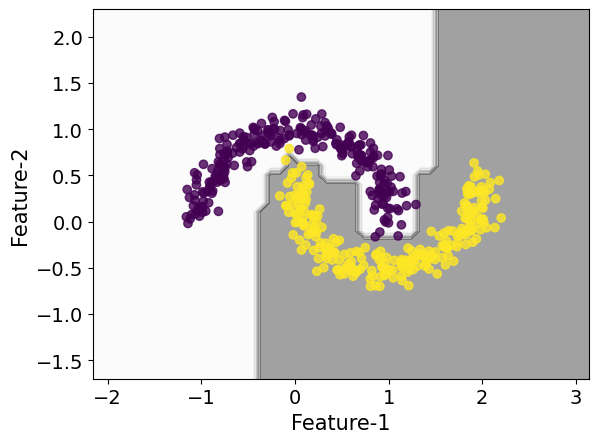

In [ ]:
plot_decision_boundaries(X, y, GradientBoostingClassifier, n_estimators = 100)

In [ ]:
## XGBoost
from xgboost import XGBClassifier

## instance
xgb = XGBClassifier( n_jobs = -1)

## fit
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:          6
    Model:               85
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            3
    BogoMIPS:            4000.27
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

In [ ]:
import numpy as np

## y = beta_0 + beta1 x + epsilon
## to get y to be between 0 and 1, we use the LOGIT transform

y = -3
logit = np.exp(y) / (1 + np.exp(y))
logit

0.04742587317756679